# Conservation of Mass

For closed systems, we assumed that no mass was transferred in or out. For open systems, mass can be transferred in and out. The amount of mass flowing is termed the mass flow rate, $\dot{m}$ (kg/s). 

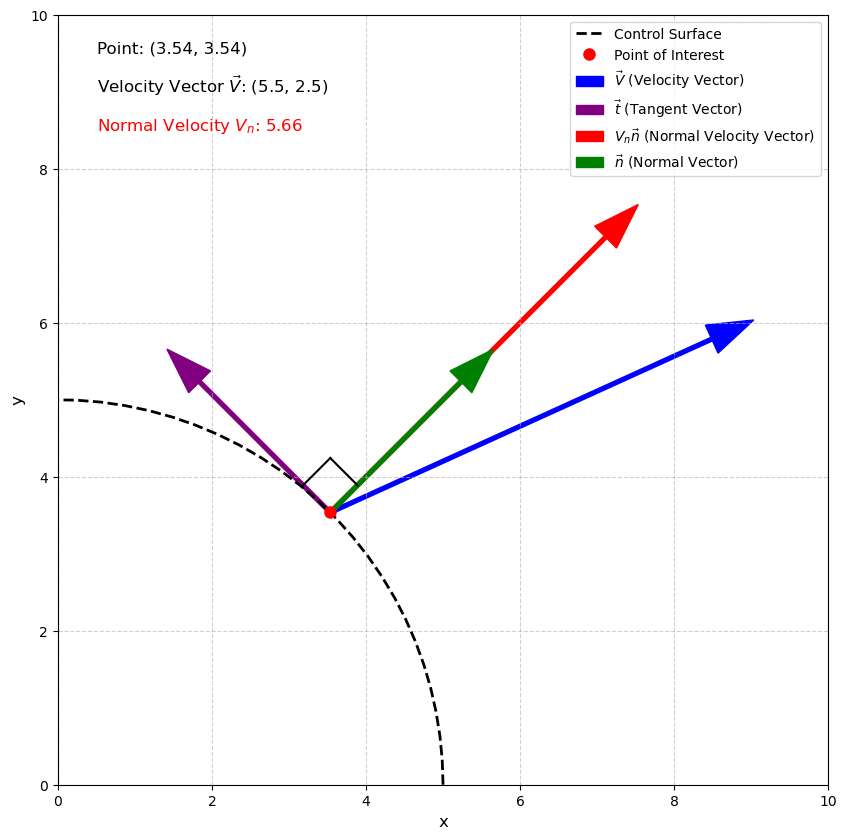

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Control Surface ---
# We'll use a circle as our control surface for simplicity.
# The normal vector is easy to calculate for a circle.
def circle(theta, radius=5):
    """Returns the x, y coordinates of a point on a circle."""
    return radius * np.cos(theta), radius * np.sin(theta)

# Create the points for plotting the circle
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle, y_circle = circle(theta_circle)

# --- 2. Define the Point of Interest ---
# Let's choose a specific point on the circle.
theta_point = np.pi / 4  # 45 degrees
x_point, y_point = circle(theta_point)

# --- 3. Define the Velocity Vector ---
# The velocity vector, V_bar, at the point of interest.
# We'll define its components as (vx, vy).
# You can change these values to see how the normal velocity changes.
vx = 5.5
vy = 2.5
V_vector = np.array([vx, vy])

# --- 4. Calculate the Normal Vector (n_bar) ---
# For a circle, the normal vector at any point (x, y) points radially outward.
# It is the normalized position vector of that point.
n_vector_unnormalized = np.array([x_point, y_point])
n_vector = n_vector_unnormalized / np.linalg.norm(n_vector_unnormalized)

# --- 5. Calculate the Tangent Vector (t_bar) ---
# This vector is perpendicular to the normal vector and lies on the surface.
t_vector = np.array([-y_point, x_point])
t_vector = t_vector / np.linalg.norm(t_vector)

# --- 6. Calculate the Normal Velocity (V_n) ---
# The normal velocity is the dot product of the velocity vector and the normal vector.
# This represents the magnitude of the fluid's velocity component that is
# perpendicular to the control surface.
V_n = np.dot(V_vector, n_vector)

# --- 7. Calculate the Projected Normal Velocity Vector ---
# This is the vector representation of the normal velocity,
# which has a magnitude of V_n and points in the direction of n_bar.
Vn_vector = V_n * n_vector

# --- 8. Plotting the Visualization ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the control surface (the circle)
ax.plot(x_circle, y_circle, 'k--', linewidth=2, label='Control Surface')

# Plot the point of interest on the surface
ax.plot(x_point, y_point, 'ro', markersize=8, label='Point of Interest')

# Plot the velocity vector (V_bar)
ax.arrow(x_point, y_point, V_vector[0], V_vector[1],
         color='blue', width=0.05, head_width=0.4,
         length_includes_head=True, label=r'$\vec{V}$ (Velocity Vector)')

# Plot the tangent vector (t_bar)
ax.arrow(x_point, y_point, t_vector[0] * 3, t_vector[1] * 3,
         color='purple', width=0.05, head_width=0.4,
         length_includes_head=True, label=r'$\vec{t}$ (Tangent Vector)')

# Plot the normal velocity vector (Vn)
ax.arrow(x_point, y_point, Vn_vector[0], Vn_vector[1],
         color='red', width=0.05, head_width=0.4,
         length_includes_head=True, label=r'$V_n\vec{n}$ (Normal Velocity Vector)')

# Plot the normal vector (n_bar)
ax.arrow(x_point, y_point, n_vector[0] * 3, n_vector[1] * 3,
         color='green', width=0.05, head_width=0.4,
         length_includes_head=True, label=r'$\vec{n}$ (Normal Vector)')

# Add a right-angle marker to show the 90-degree relationship between n_bar and t_bar
angle_marker_size = 0.5
ax.plot([x_point + n_vector[0] * angle_marker_size,
         x_point + n_vector[0] * angle_marker_size + t_vector[0] * angle_marker_size],
        [y_point + n_vector[1] * angle_marker_size,
         y_point + n_vector[1] * angle_marker_size + t_vector[1] * angle_marker_size],
        color='black')
ax.plot([x_point + t_vector[0] * angle_marker_size,
         x_point + t_vector[0] * angle_marker_size + n_vector[0] * angle_marker_size],
        [y_point + t_vector[1] * angle_marker_size,
         y_point + t_vector[1] * angle_marker_size + n_vector[1] * angle_marker_size],
        color='black')

# Add labels and title
# ax.set_title(r'Visualization of Velocity Vectors on a Control Surface', fontsize=16)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper right')

# Add text with the calculated values for clarity
ax.text(0.05, 0.95, f'Point: ({x_point:.2f}, {y_point:.2f})', transform=ax.transAxes, fontsize=12)
ax.text(0.05, 0.90, f'Velocity Vector $\\vec{{V}}$: ({V_vector[0]}, {V_vector[1]})', transform=ax.transAxes, fontsize=12)
ax.text(0.05, 0.85, f'Normal Velocity $V_n$: {V_n:.2f}', transform=ax.transAxes, fontsize=12, color='red')
#ax.text(0.05, 0.80, r'$\vec{n}$ is normal to the surface, as shown by the right angle with the tangent line.',
        #transform=ax.transAxes, fontsize=12, color='green')

# Set the limits of the plot to ensure all vectors are visible
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.savefig('velocity-vector.pdf')

plt.show()


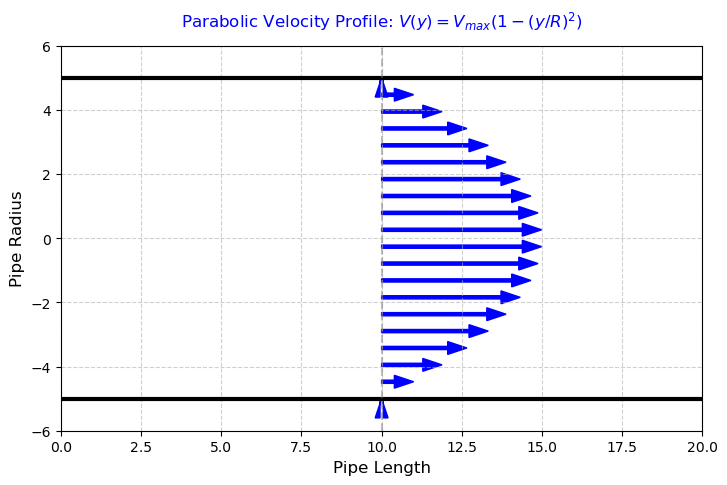

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Pipe and Parameters ---
# We'll model the pipe with two horizontal lines.
pipe_radius = 5.0
pipe_length = 20.0
# The maximum velocity at the center of the pipe.
v_max = 5.0

# Define the y-range across the pipe's diameter
# The pipe goes from y = -radius to y = +radius
y_values = np.linspace(-pipe_radius, pipe_radius, 20)

# --- 2. Calculate the Parabolic Velocity Profile ---
# The formula for a parabolic velocity profile is:
# V(y) = V_max * (1 - (y/R)^2)
# where V_max is the max velocity, R is the radius, and y is the distance from the center.
# We'll create a function for this.
def parabolic_velocity(y, max_vel, radius):
    """Calculates the velocity at a given y-coordinate."""
    return max_vel * (1 - (y / radius)**2)

# --- 3. Plotting the Visualization ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the top and bottom walls of the pipe
ax.hlines(pipe_radius, xmin=0, xmax=pipe_length, color='black', linewidth=3, label='Pipe Walls')
ax.hlines(-pipe_radius, xmin=0, xmax=pipe_length, color='black', linewidth=3)

# Plot the velocity vectors
# We'll plot them at x = pipe_length / 2 for visual clarity
x_position = pipe_length / 2
for y in y_values:
    # Calculate the velocity magnitude at this y-position
    velocity_magnitude = parabolic_velocity(y, v_max, pipe_radius)
    
    # Plot an arrow to represent the velocity vector
    ax.arrow(x_position, y, velocity_magnitude, 0,
             color='blue', width=0.1, head_width=0.4,
             length_includes_head=True)

# Add a central axis line to show the pipe center
ax.axvline(x_position, color='gray', linestyle='--', alpha=0.5)

# Add a text label for the velocity profile formula
ax.text(0.5, 1.05, r'Parabolic Velocity Profile: $V(y) = V_{max}(1 - (y/R)^2)$', 
        transform=ax.transAxes, ha='center', fontsize=12, color='blue')

# Set labels and title
# ax.set_title('Parabolic Velocity Profile in a Pipe', fontsize=16)
ax.set_xlabel('Pipe Length', fontsize=12)
ax.set_ylabel('Pipe Radius', fontsize=12)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(0, pipe_length)
ax.set_ylim(-pipe_radius - 1, pipe_radius + 1)

plt.savefig('velocity-profile.pdf')

plt.show()
